<a href="https://colab.research.google.com/github/naralakamsani/randomized_optimization/blob/main/randomized_optimization_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [3]:
!pip install -q mlrose-hiive
!pip install -q joblib==1.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 5.5 MB/s eta 0:00:00


In [4]:
import mlrose_hiive

import numpy as np
import matplotlib.pyplot as plt

from mlrose_hiive import TSPGenerator, ContinuousPeaksGenerator, KnapsackGenerator

from mlrose_hiive import SARunner, GARunner, RHCRunner, MIMICRunner

import time

# Functions

In [5]:
def find_optimal_curves(rhc, sa, ga, mimic, focus_size, maximize=True):
  if maximize:
    rhc_optimal = rhc[focus_size][0]["Fitness"].max()
    sa_optimal = sa[focus_size][0]["Fitness"].max()
    ga_optimal = ga[focus_size][0]["Fitness"].max()
    mimic_optimal = mimic[focus_size][0]["Fitness"].max()
  else:
    rhc_optimal = rhc[focus_size][0]["Fitness"].min()
    sa_optimal = sa[focus_size][0]["Fitness"].min()
    ga_optimal = ga[focus_size][0]["Fitness"].min()
    mimic_optimal = mimic[focus_size][0]["Fitness"].min()


  rhc_optimal_restart = rhc[focus_size][0][rhc[focus_size][0]["Fitness"] == rhc_optimal]['current_restart'].values[0]
  rhc_optimal_fitness = rhc[focus_size][1][rhc[focus_size][1]["current_restart"] == rhc_optimal_restart]


  sa_optimal_temp = sa[focus_size][0][sa[focus_size][0]["Fitness"] == sa_optimal]['Temperature'].values[0]
  sa_optimal_fitness = sa[focus_size][1][sa[focus_size][1]["Temperature"] == sa_optimal_temp]


  ga_optimal_mutation_rate = ga[focus_size][0][ga[focus_size][0]["Fitness"] == ga_optimal]['Mutation Rate'].values[0]
  ga_optimal_fitness = ga[focus_size][1][ga[focus_size][1]['Mutation Rate'] == ga_optimal_mutation_rate]

  mimic_optimal_keep_pct = mimic[focus_size][0][mimic[focus_size][0]["Fitness"] == mimic_optimal]['Keep Percent'].values[0]
  mimic_optimal_fitness = mimic[focus_size][1][mimic[focus_size][1]['Keep Percent'] == mimic_optimal_keep_pct]

  return rhc_optimal_fitness, sa_optimal_fitness, ga_optimal_fitness, mimic_optimal_fitness

In [6]:
def fitness_problem_size(title, rhc, sa, ga, mimic, problem_sizes, maximize=True):
  plt.figure()
  plt.title(title)

  plt.xlabel("Problem Size")
  plt.ylabel("Fitness")

  problems_sizes_lst = list(problem_sizes)

  plt.grid()

  rhc_best_fitness = []
  sa_best_fitness = []
  ga_best_fitness = []
  mimic_best_fitness = []

  if maximize:
    for problem_size in problem_sizes:
      rhc_best_fitness.append(rhc[problem_size][0]["Fitness"].max())
      sa_best_fitness.append(sa[problem_size][0]["Fitness"].max())
      ga_best_fitness.append(ga[problem_size][0]["Fitness"].max())
      mimic_best_fitness.append(mimic[problem_size][0]["Fitness"].max())
  else:
    for problem_size in problem_sizes:
      rhc_best_fitness.append(rhc[problem_size][0]["Fitness"].min())
      sa_best_fitness.append(sa[problem_size][0]["Fitness"].min())
      ga_best_fitness.append(ga[problem_size][0]["Fitness"].min())
      mimic_best_fitness.append(mimic[problem_size][0]["Fitness"].min())

  plt.plot(problems_sizes_lst, ga_best_fitness, 'o-', color="b", label="GA",linewidth=3)
  plt.plot(problems_sizes_lst, rhc_best_fitness, 'o-', color="r", label="RHC")
  plt.plot(problems_sizes_lst, sa_best_fitness, 'o-', color="g", label="SA")
  plt.plot(problems_sizes_lst, mimic_best_fitness, 'o-', color="y", label="MMIC")

  plt.legend(loc="best")

  return plt


In [ ]:
def fitness_iteration(title, rhc, sa, ga, mimic):
  plt.figure()
  plt.title(title)

  plt.xlabel("Iterations")
  plt.ylabel("Fitness")

  plt.grid()

  plt.plot(ga["Iteration"], ga["Fitness"], color="b", label="GA")
  plt.plot(rhc["Iteration"], rhc["Fitness"], color="r", label="RHC")
  plt.plot(sa["Iteration"], sa["Fitness"], color="g", label="SA")
  plt.plot(mimic["Iteration"], mimic["Fitness"], color="y", label="MMIC")

  plt.legend(loc="best")

  return plt

In [ ]:
def fevals_time(title, rhc, sa, ga, mimic):
  plt.figure()
  plt.title(title)

  plt.xlabel("Iterations")
  plt.ylabel("Function Evaluations")

  plt.grid()

  plt.plot(ga["Iteration"], ga["FEvals"], color="b", label="GA")
  plt.plot(rhc["Iteration"], rhc["FEvals"]-rhc["FEvals"].min(), color="r", label="RHC", linewidth=2)
  plt.plot(sa["Iteration"], sa["FEvals"], color="g", label="SA")
  plt.plot(mimic["Iteration"], mimic["FEvals"], color="y", label="MMIC")

  plt.legend(loc="best")

  return plt

In [ ]:
def wall_clock_times(title, rhc, sa, ga, mimic):
  plt.figure()
  plt.title(title)

  plt.ylabel('Wall Clock Time(s)')
  plt.xlabel("Algorithm")

  algorithms = ['RHC', 'SA', 'GA', 'MIMIC']

  times = []

  times = [sum(rhc['Time']), sa['Time'].max(), ga['Time'].max(), mimic['Time'].max()]

  plt.grid()

  bar1 = plt.bar(algorithms, times, color=['r','g','b','y'])

  return plt

#Random Seed

In [ ]:
SEED = 0

# Countinous Peaks

In [ ]:
cp_problem_sizes = range(5,106,20)
cp_problems = [(n, ContinuousPeaksGenerator().generate(seed=SEED, size=n,t_pct=0.1)) for n in cp_problem_sizes]

## Randomized Hill Climbing

In [ ]:
cp_rhc_fitnesses = {}

for problem_size, problem in cp_problems:

  rhc = RHCRunner(problem=problem,
                      experiment_name='cp_rhc_'+str(problem_size),
                      output_directory=None,
                      seed=SEED,
                      iteration_list=[1000],
                      max_attempts=100,
                      restart_list=[25])

  df_run_stats, df_run_curves = rhc.run()

  cp_rhc_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Simulated Annealing

In [ ]:
cp_sa_fitnesses = {}

for problem_size, problem in cp_problems:

  sa = SARunner(problem=problem,
                experiment_name='cp_sa_'+str(problem_size),
                output_directory=None,
                seed=SEED,
                iteration_list=[10000],
                max_attempts=100,
                temperature_list=[0.1, 0.5, 0.75, 1],
                decay_list=[mlrose_hiive.GeomDecay])

  df_run_stats, df_run_curves = sa.run()

  cp_sa_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Genetic Algorithms

In [ ]:
cp_ga_fitnesses = {}

for problem_size, problem in cp_problems:

  ga = GARunner(problem=problem,
                experiment_name='cp_ga_'+str(problem_size),
                output_directory=None,
                seed=SEED,
                iteration_list=[10000],
                max_attempts=100,
                population_sizes=[200],
                mutation_rates=[0.25,0.5,0.75])

  df_run_stats, df_run_curves = ga.run()

  cp_ga_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Mutual-Information-Maximizing Input Clustering

In [ ]:
cp_mimic_fitnesses = {}

for problem_size, problem in cp_problems:

  mimic = MIMICRunner(problem=problem,
                  experiment_name='cp_mimic_'+str(problem_size),
                  output_directory=None,
                  seed=SEED,
                  iteration_list=[10000],
                  population_sizes=[200],
                  max_attempts=100,
                  keep_percent_list=[0.25, 0.5, 0.75, 1],
                  use_fast_mimic=True)

  df_run_stats, df_run_curves = mimic.run()

  cp_mimic_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Plots

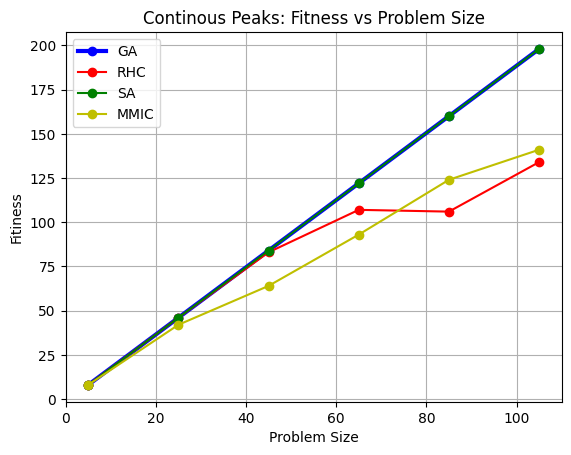

In [ ]:
fitness_problem_size("Continous Peaks: Fitness vs Problem Size", cp_rhc_fitnesses, cp_sa_fitnesses, cp_ga_fitnesses, cp_mimic_fitnesses, cp_problem_sizes)
plt.show()

In [ ]:
cp_focus_size = 85
cp_rhc_optimal_fitness, cp_sa_optimal_fitness, cp_ga_optimal_fitness, cp_mimic_optimal_fitness = find_optimal_curves(cp_rhc_fitnesses, cp_sa_fitnesses, cp_ga_fitnesses, cp_mimic_fitnesses, cp_focus_size, maximize=True)

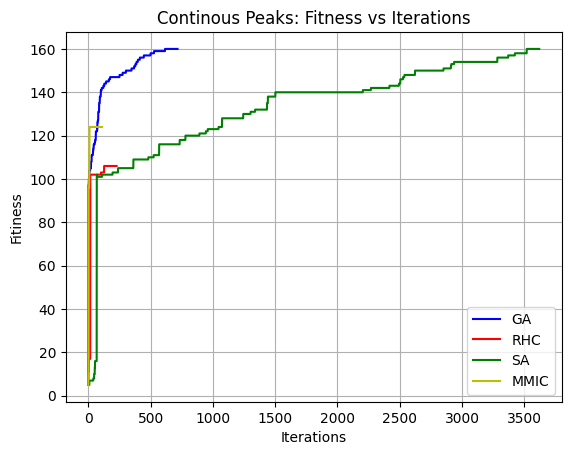

In [ ]:
fitness_iteration("Continous Peaks: Fitness vs Iterations", cp_rhc_optimal_fitness, cp_sa_optimal_fitness, cp_ga_optimal_fitness, cp_mimic_optimal_fitness)
plt.show()

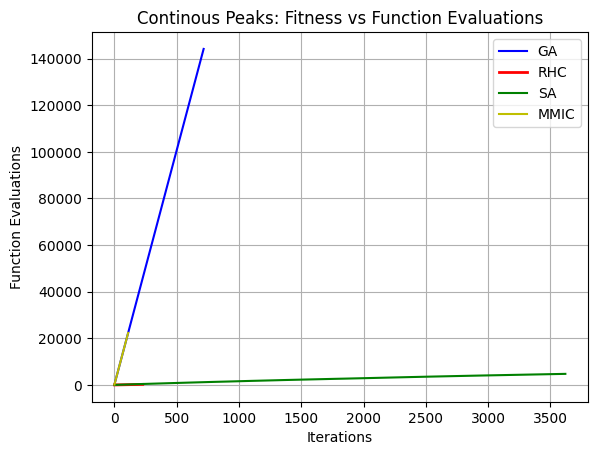

In [ ]:
fevals_time("Continous Peaks: Function Evaluations vs Iterations", cp_rhc_optimal_fitness, cp_sa_optimal_fitness, cp_ga_optimal_fitness, cp_mimic_optimal_fitness)
plt.show()

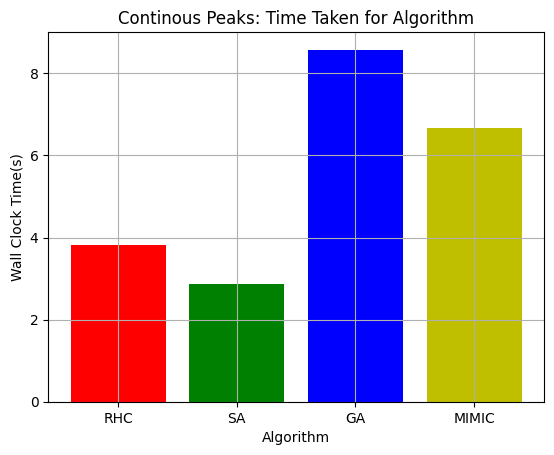

In [ ]:
wall_clock_times("Continous Peaks: Time Taken for Algorithm", cp_rhc_optimal_fitness, cp_sa_optimal_fitness, cp_ga_optimal_fitness, cp_mimic_optimal_fitness)
plt.show()

# Knapsack

In [ ]:
k_problem_sizes = range(5,56,10)
k_problems = [(n, KnapsackGenerator().generate(seed=SEED, number_of_items_types=n)) for n in k_problem_sizes]

## Randomized Hill Climbing

In [ ]:
k_rhc_fitnesses = {}

for problem_size, problem in k_problems:

  rhc = RHCRunner(problem=problem,
                      experiment_name='k_rhc_'+str(problem_size),
                      output_directory=None,
                      seed=SEED,
                      iteration_list=[1000],
                      max_attempts=100,
                      restart_list=[25])

  df_run_stats, df_run_curves = rhc.run()

  k_rhc_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Simulated Annealing

In [ ]:
k_sa_fitnesses = {}

for problem_size, problem in k_problems:

  sa = SARunner(problem=problem,
                experiment_name='k_sa_'+str(problem_size),
                output_directory=None,
                seed=SEED,
                iteration_list=[10000],
                max_attempts=100,
                temperature_list=[0.1, 0.5, 0.75, 1],
                decay_list=[mlrose_hiive.GeomDecay])

  df_run_stats, df_run_curves = sa.run()

  k_sa_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Genetic Algorithms

In [ ]:
k_ga_fitnesses = {}

for problem_size, problem in k_problems:

  ga = GARunner(problem=problem,
                experiment_name='cp_ga_'+str(problem_size),
                output_directory=None,
                seed=SEED,
                iteration_list=[10000],
                max_attempts=100,
                population_sizes=[200],
                mutation_rates=[0.25,0.5,0.75])

  df_run_stats, df_run_curves = ga.run()

  k_ga_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Mutual-Information-Maximizing Input Clustering

In [ ]:
k_mimic_fitnesses = {}

for problem_size, problem in k_problems:

  mimic = MIMICRunner(problem=problem,
                  experiment_name='k_mimic_'+str(problem_size),
                  output_directory=None,
                  seed=SEED,
                  iteration_list=[10000],
                  population_sizes=[200],
                  max_attempts=100,
                  keep_percent_list=[0.25, 0.5, 0.75, 1],
                  use_fast_mimic=True)

  df_run_stats, df_run_curves = mimic.run()

  k_mimic_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Plots

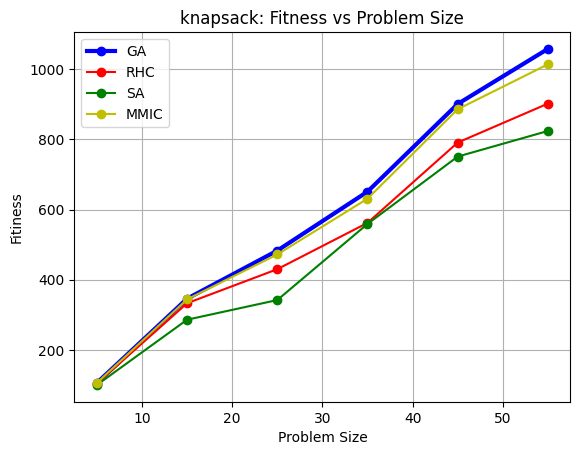

In [ ]:
fitness_problem_size("knapsack: Fitness vs Problem Size", k_rhc_fitnesses, k_sa_fitnesses, k_ga_fitnesses, k_mimic_fitnesses, k_problem_sizes)
plt.show()

In [ ]:
k_focus_size = 45
k_rhc_optimal_fitness, k_sa_optimal_fitness, k_ga_optimal_fitness, k_mimic_optimal_fitness = find_optimal_curves(k_rhc_fitnesses, k_sa_fitnesses, k_ga_fitnesses, k_mimic_fitnesses, k_focus_size, maximize=True)

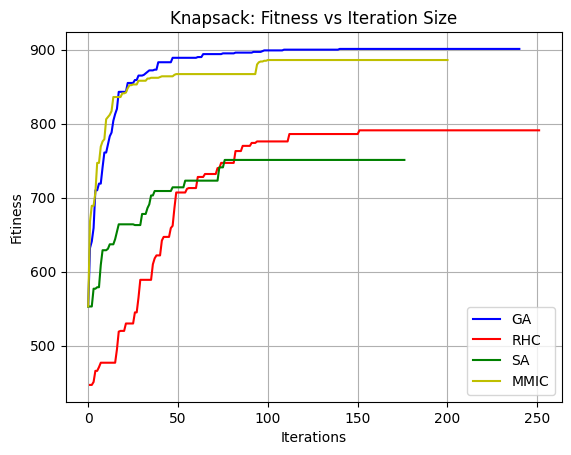

In [ ]:
fitness_iteration("Knapsack: Fitness vs Iteration Size", k_rhc_optimal_fitness, k_sa_optimal_fitness, k_ga_optimal_fitness, k_mimic_optimal_fitness)
plt.show()

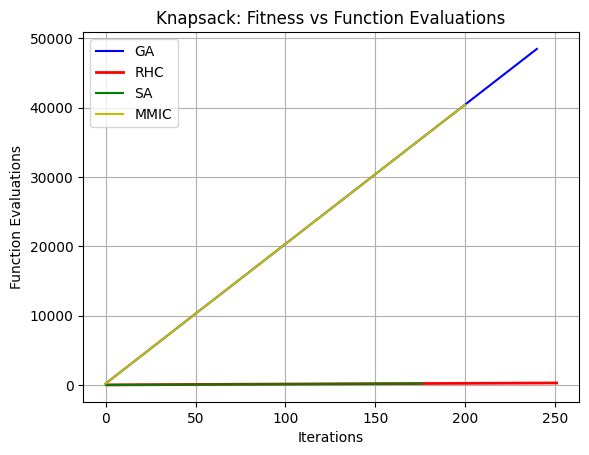

In [ ]:
fevals_time("Knapsack: Function Evaluations vs Iterations", k_rhc_optimal_fitness, k_sa_optimal_fitness, k_ga_optimal_fitness, k_mimic_optimal_fitness)
plt.show()

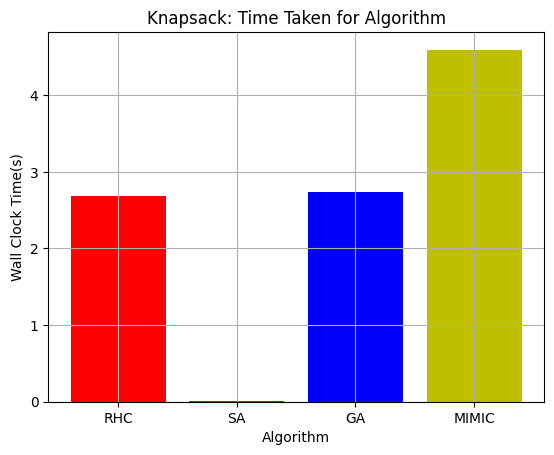

In [ ]:
wall_clock_times("Knapsack: Time Taken for Algorithm", k_rhc_optimal_fitness, k_sa_optimal_fitness, k_ga_optimal_fitness, k_mimic_optimal_fitness)
plt.show()

# Traveling Salesman Problem

In [ ]:
ts_problem_sizes = range(5,21,5)
ts_problems = [(n, TSPGenerator().generate(seed=SEED, number_of_cities=n)) for n in ts_problem_sizes]

## Randomized Hill Climbing

In [ ]:
ts_rhc_fitnesses = {}

for problem_size, problem in ts_problems:

  rhc = RHCRunner(problem=problem,
                      experiment_name='ts_rhc_'+str(problem_size),
                      output_directory=None,
                      seed=SEED,
                      iteration_list=[1000],
                      max_attempts=100,
                      restart_list=[25])

  df_run_stats, df_run_curves = rhc.run()

  df_run_stats['Fitness']*=-1
  df_run_curves['Fitness']*=-1

  ts_rhc_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Simulated Annealing

In [ ]:
ts_sa_fitnesses = {}

for problem_size, problem in ts_problems:

  sa = SARunner(problem=problem,
                experiment_name='ts_sa_'+str(problem_size),
                output_directory=None,
                seed=SEED,
                iteration_list=[10000],
                max_attempts=100,
                temperature_list=[0.1, 0.5, 0.75, 1],
                decay_list=[mlrose_hiive.GeomDecay])

  df_run_stats, df_run_curves = sa.run()

  df_run_stats['Fitness']*=-1
  df_run_curves['Fitness']*=-1

  ts_sa_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Genetic Algorithms

In [ ]:
ts_ga_fitnesses = {}

for problem_size, problem in ts_problems:

  ga = GARunner(problem=problem,
                experiment_name='cp_ga_'+str(problem_size),
                output_directory=None,
                seed=SEED,
                iteration_list=[10000],
                max_attempts=100,
                population_sizes=[200],
                mutation_rates=[0.25,0.5,0.75])

  df_run_stats, df_run_curves = ga.run()

  df_run_stats['Fitness']*=-1
  df_run_curves['Fitness']*=-1

  ts_ga_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Mutual-Information-Maximizing Input Clustering

In [ ]:
ts_mimic_fitnesses = {}

for problem_size, problem in ts_problems:

  mimic = MIMICRunner(problem=problem,
                  experiment_name='ts_mimic_'+str(problem_size),
                  output_directory=None,
                  seed=SEED,
                  iteration_list=[10000],
                  population_sizes=[200],
                  max_attempts=100,
                  keep_percent_list=[0.25, 0.5, 0.75, 1],
                  use_fast_mimic=True)

  df_run_stats, df_run_curves = mimic.run()

  df_run_stats['Fitness']*=-1
  df_run_curves['Fitness']*=-1

  ts_mimic_fitnesses[problem_size] = [df_run_stats, df_run_curves]

## Plots

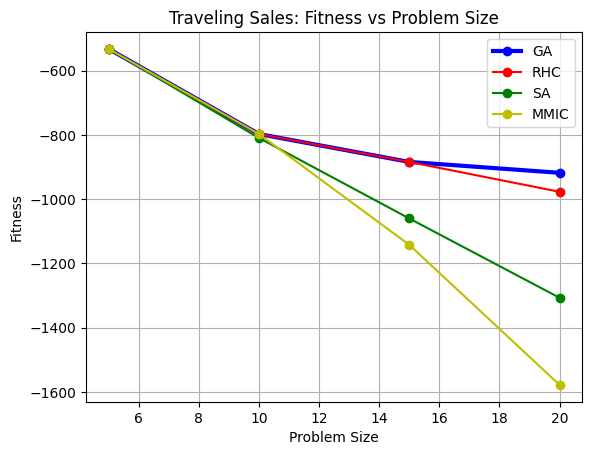

In [ ]:
fitness_problem_size("Traveling Sales: Fitness vs Problem Size", ts_rhc_fitnesses, ts_sa_fitnesses, ts_ga_fitnesses, ts_mimic_fitnesses, ts_problem_sizes)
plt.show()

In [ ]:
ts_focus_size = 15
ts_rhc_optimal_fitness, ts_sa_optimal_fitness, ts_ga_optimal_fitness, ts_mimic_optimal_fitness = find_optimal_curves(ts_rhc_fitnesses, ts_sa_fitnesses, ts_ga_fitnesses, ts_mimic_fitnesses, ts_focus_size)

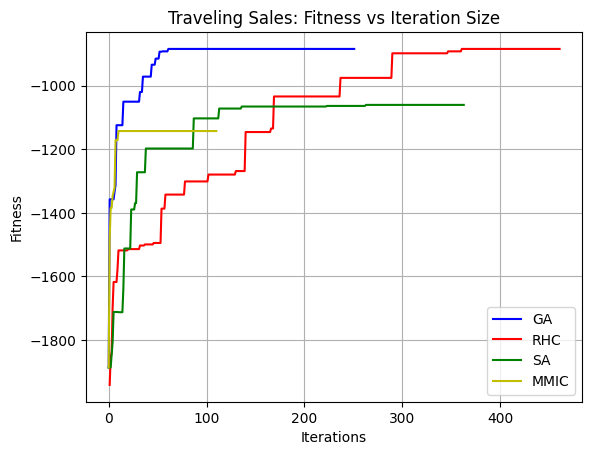

In [ ]:
fitness_iteration("Traveling Sales: Fitness vs Iteration Size", ts_rhc_optimal_fitness, ts_sa_optimal_fitness, ts_ga_optimal_fitness, ts_mimic_optimal_fitness)
plt.show()

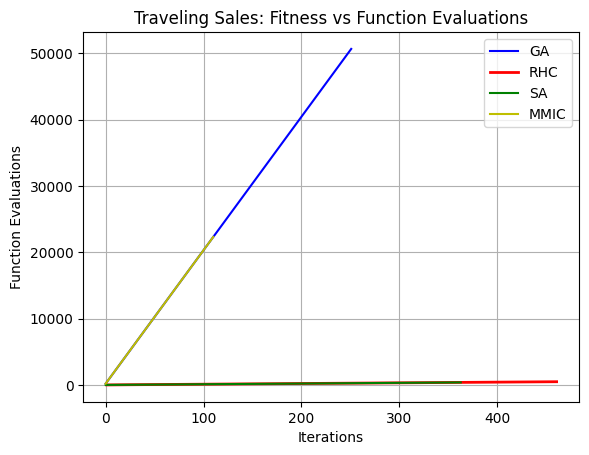

In [ ]:
fevals_time("Traveling Sales: Function Evaluations vs Iterations", ts_rhc_optimal_fitness, ts_sa_optimal_fitness, ts_ga_optimal_fitness, ts_mimic_optimal_fitness)
plt.show()

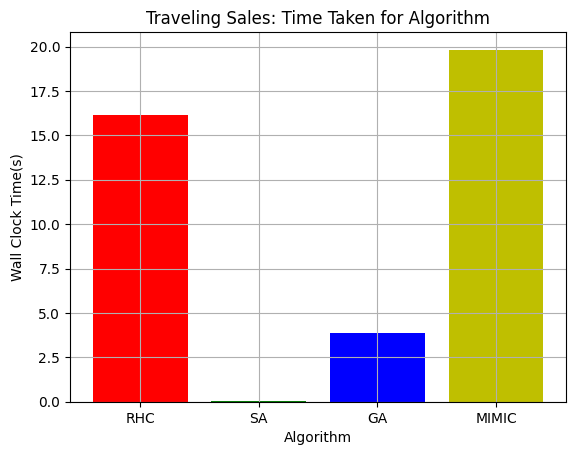

In [ ]:
wall_clock_times("Traveling Sales: Time Taken for Algorithm", ts_rhc_optimal_fitness, ts_sa_optimal_fitness, ts_ga_optimal_fitness, ts_mimic_optimal_fitness)
plt.show()